In [ ]:
!kaggle datasets download jeremylarcher/canadian-house-prices-for-top-cities

Dataset URL: https://www.kaggle.com/datasets/jeremylarcher/canadian-house-prices-for-top-cities
License(s): apache-2.0
canadian-house-prices-for-top-cities.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:

!unzip /content/canadian-house-prices-for-top-cities.zip

Archive:  /content/canadian-house-prices-for-top-cities.zip
  inflating: HouseListings-Top45Cities-10292023-kaggle.csv  


In [ ]:
import pandas as pd
df= pd.read_csv ('/content/HouseListings-Top45Cities-10292023-kaggle.csv', encoding='latin1')

In [ ]:
df

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,779900.0,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000.0
1,Toronto,799999.0,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000.0
2,Toronto,799900.0,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000.0
3,Toronto,1200000.0,275 MORTIMER AVE,4,2,Ontario,5647656,43.7417,-79.3733,97000.0
4,Toronto,668800.0,#420 -388 RICHMOND ST,1,1,Ontario,5647656,43.7417,-79.3733,97000.0
...,...,...,...,...,...,...,...,...,...,...
35763,Halifax,439900.0,301 60 Walter Havill Drive,2,2,Nova Scotia,431479,44.8857,63.1005,86753.0
35764,Halifax,6990000.0,1160 Rockcliffe Street,5,5,Nova Scotia,431479,44.8857,63.1005,86753.0
35765,Halifax,419900.0,212 60 Walter Havill Drive,2,2,Nova Scotia,431479,44.8857,63.1005,86753.0
35766,Halifax,949900.0,10 Idlewylde Road,3,1,Nova Scotia,431479,44.8857,63.1005,86753.0


In [ ]:
df.drop('Address', axis = 1, inplace = True)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35768 entries, 0 to 35767
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  35768 non-null  object 
 1   Price                 35768 non-null  float64
 2   Number_Beds           35768 non-null  int64  
 3   Number_Baths          35768 non-null  int64  
 4   Province              35768 non-null  object 
 5   Population            35768 non-null  int64  
 6   Latitude              35768 non-null  float64
 7   Longitude             35768 non-null  float64
 8   Median_Family_Income  35768 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 2.5+ MB


In [ ]:
df.isna().sum()

,0
City,0
Price,0
Number_Beds,0
Number_Baths,0
Province,0
Population,0
Latitude,0
Longitude,0
Median_Family_Income,0


In [ ]:
if df['Price'].isna().sum()>0:
  df.dropna(subset='Price')


In [ ]:
X = df.drop('Price',axis=1)
y=df['Price'].copy()

In [ ]:
X

,City,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,3,2,Ontario,5647656,43.7417,-79.3733,97000.0
1,Toronto,3,1,Ontario,5647656,43.7417,-79.3733,97000.0
2,Toronto,2,2,Ontario,5647656,43.7417,-79.3733,97000.0
3,Toronto,4,2,Ontario,5647656,43.7417,-79.3733,97000.0
4,Toronto,1,1,Ontario,5647656,43.7417,-79.3733,97000.0
...,...,...,...,...,...,...,...,...
35763,Halifax,2,2,Nova Scotia,431479,44.8857,63.1005,86753.0
35764,Halifax,5,5,Nova Scotia,431479,44.8857,63.1005,86753.0
35765,Halifax,2,2,Nova Scotia,431479,44.8857,63.1005,86753.0
35766,Halifax,3,1,Nova Scotia,431479,44.8857,63.1005,86753.0


In [ ]:
y

,Price
0,779900.0
1,799999.0
2,799900.0
3,1200000.0
4,668800.0
...,...
35763,439900.0
35764,6990000.0
35765,419900.0
35766,949900.0


In [ ]:
df.isna().sum()

,0
City,0
Price,0
Number_Beds,0
Number_Baths,0
Province,0
Population,0
Latitude,0
Longitude,0
Median_Family_Income,0


In [ ]:
import numpy as np
X_cat = X.select_dtypes(include = 'object')
X_num = X.select_dtypes(include = np.number)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(sparse_output = False, handle_unknown='ignore')
one_hot_result = onehot.fit_transform(X_cat)


In [ ]:
feature_names = onehot.get_feature_names_out(X_cat.columns)

In [ ]:
onehotdf = pd.DataFrame(one_hot_result, columns = feature_names)
onehotdf

,City_Abbotsford,City_Airdrie,City_Barrie,City_Brantford,City_Burnaby,City_Caledon,City_Calgary,City_Edmonton,City_Guelph,City_Halifax,...,City_Winnipeg,Province_Alberta,Province_British Columbia,Province_Manitoba,Province_New Brunswick,Province_Newfoundland and Labrador,Province_Nova Scotia,Province_Ontario,Province_Quebec,Province_Saskatchewan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
35764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
35765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
35766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
final_df = pd.concat([df, onehotdf], axis=1)

In [ ]:
final_df

,City,Price,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income,City_Abbotsford,...,City_Winnipeg,Province_Alberta,Province_British Columbia,Province_Manitoba,Province_New Brunswick,Province_Newfoundland and Labrador,Province_Nova Scotia,Province_Ontario,Province_Quebec,Province_Saskatchewan
0,Toronto,779900.0,3,2,Ontario,5647656,43.7417,-79.3733,97000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,Toronto,799999.0,3,1,Ontario,5647656,43.7417,-79.3733,97000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Toronto,799900.0,2,2,Ontario,5647656,43.7417,-79.3733,97000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Toronto,1200000.0,4,2,Ontario,5647656,43.7417,-79.3733,97000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Toronto,668800.0,1,1,Ontario,5647656,43.7417,-79.3733,97000.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35763,Halifax,439900.0,2,2,Nova Scotia,431479,44.8857,63.1005,86753.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
35764,Halifax,6990000.0,5,5,Nova Scotia,431479,44.8857,63.1005,86753.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
35765,Halifax,419900.0,2,2,Nova Scotia,431479,44.8857,63.1005,86753.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
35766,Halifax,949900.0,3,1,Nova Scotia,431479,44.8857,63.1005,86753.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
final_df.drop(['City', 'Province'], axis = 1, inplace = True)

In [ ]:
X = final_df

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

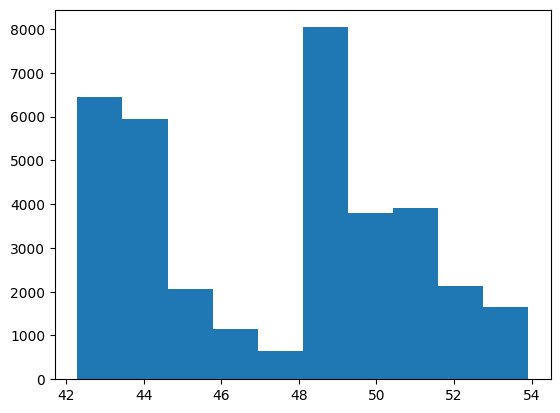

In [ ]:
plt.hist(X['Latitude']);

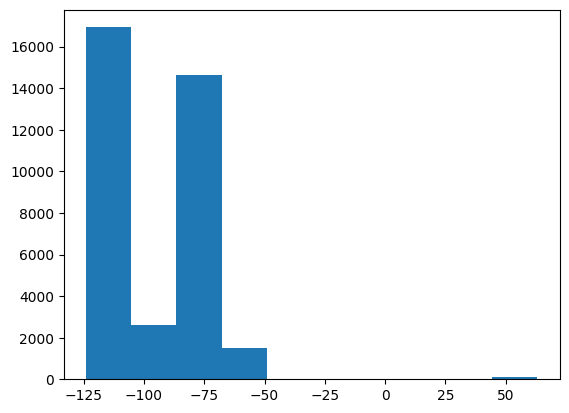

In [ ]:
plt.hist(X['Longitude']);

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28614, 61), (7154, 61), (28614,), (7154,))

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
forest_reg.score(X_test, y_test)

0.9982044799090496

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg.score(X_test, y_test)

1.0